### EDA on Walmart dataset

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading dataset

In [2]:
data=pd.read_csv('./walmart-sales-dataset-of-45stores.csv',parse_dates=['Date'])
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
data.shape

(6435, 8)

In [5]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
data.Store.nunique()

45

In [8]:
data.isnull().mean()

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [9]:
data.duplicated().sum()

0

In [10]:
### Extracting the dates

In [11]:
data['Year']=data.Date.dt.year
data['Month']=data.Date.dt.month
data['Day']=data.Date.dt.day

In [12]:
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


In [13]:
data.Year.value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

In [14]:
data['Weekday']=data.Date.dt.day_of_week
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,0


In [15]:
data.Weekday.replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:'Saturday'},inplace=True)

In [16]:
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,Saturday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,Wednesday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,Thursday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,Thursday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,Sunday


In [17]:
year_2010=data.query('Year==2010')

In [18]:
data.Month.replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:'June',7:'July',8:"August",9:"September",10:"October",11:"November",12:'December'},inplace=True)

In [19]:
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,May,2,Saturday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,December,2,Wednesday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February,19,Thursday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February,26,Thursday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,May,3,Sunday


### Univariate Analysis

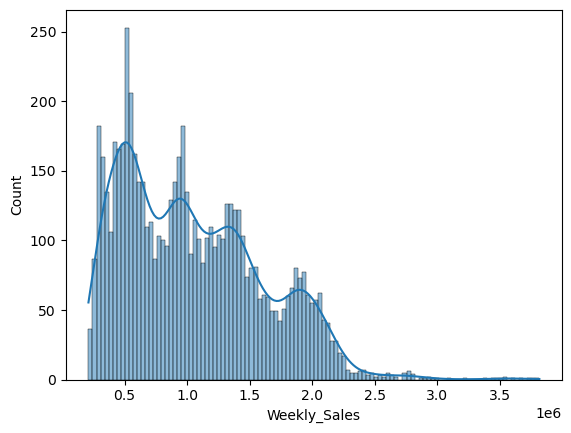

In [20]:
sns.histplot(data=data,kde=True,x='Weekly_Sales',bins=112)
plt.show()

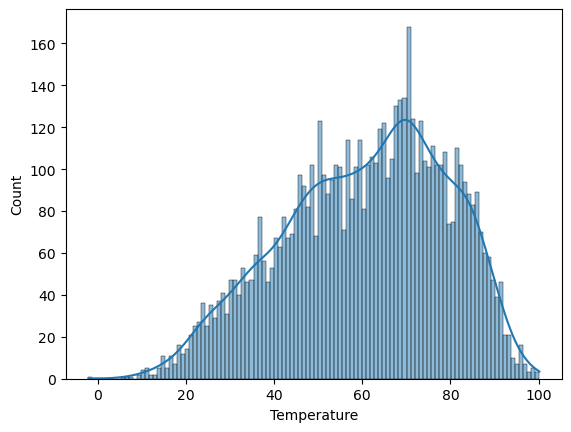

In [21]:
sns.histplot(data=data,kde=True,x='Temperature',bins=112)
plt.show()

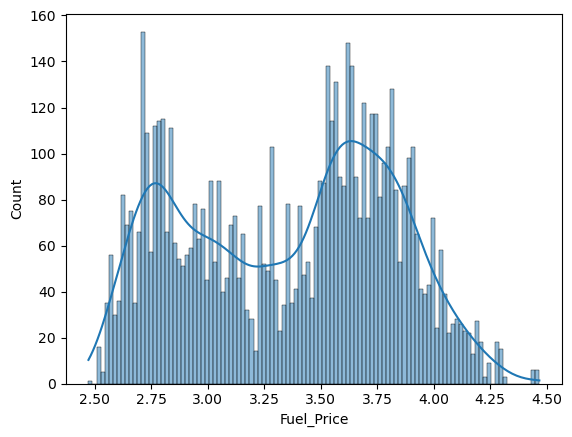

In [22]:
sns.histplot(data=data,kde=True,x='Fuel_Price',bins=112)
plt.show()

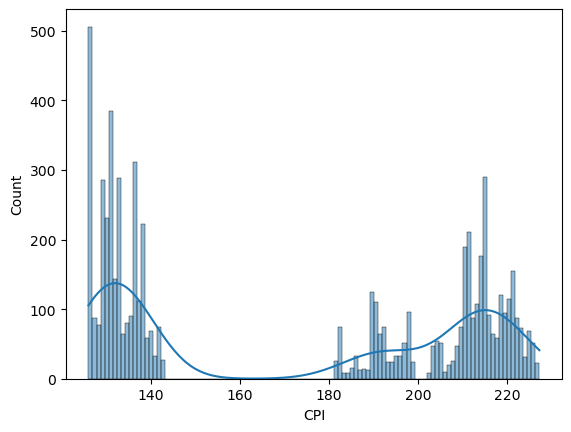

In [23]:
sns.histplot(data=data,kde=True,x='CPI',bins=112)
plt.show()

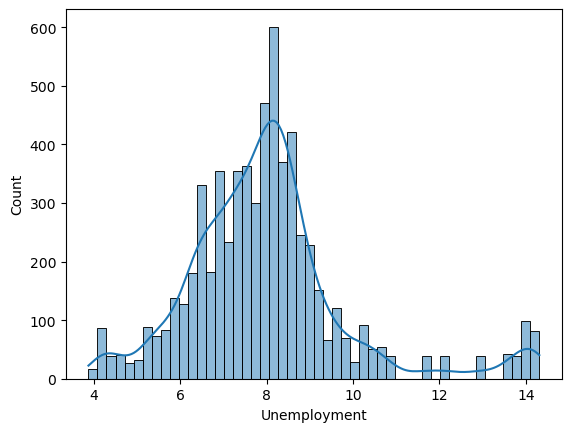

In [24]:
sns.histplot(data=data,kde=True,x='Unemployment',bins=50)
plt.show()

In [25]:
data.sample()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
5852,41,2012-08-17,1560590.05,0,65.77,3.545,198.100106,6.432,2012,August,17,Thursday


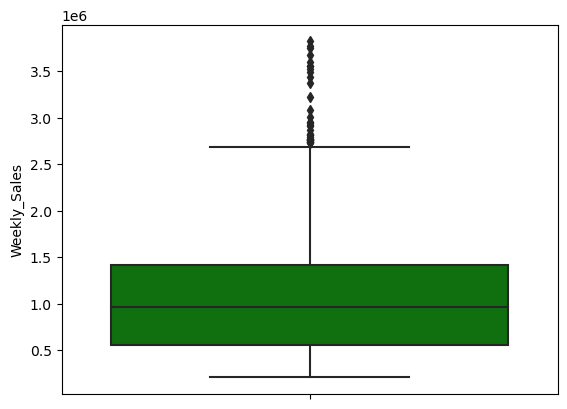

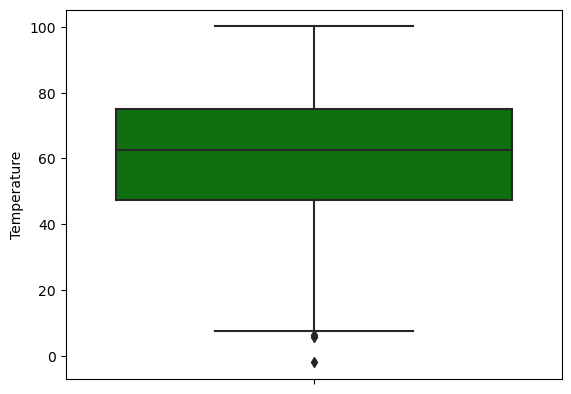

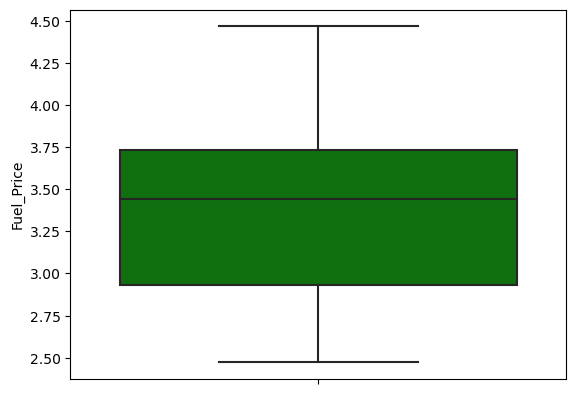

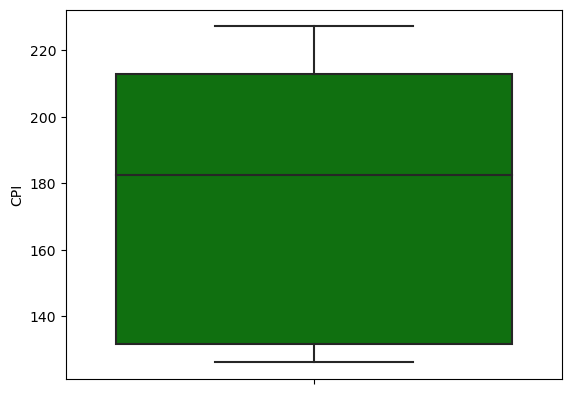

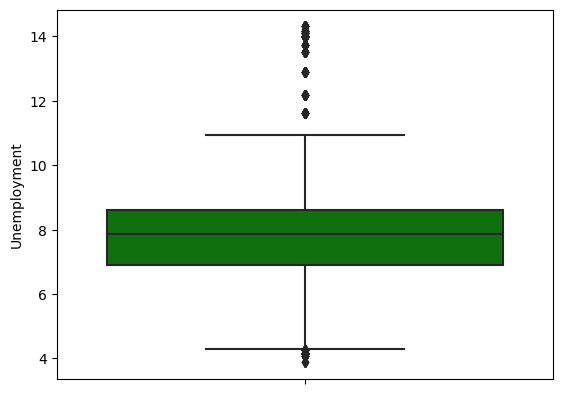

In [26]:
c_lst=['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
for i in c_lst:
    sns.boxplot(y=data[i],data=data,color='g')
    plt.show()

In [27]:
year_2011=data.query('Year==2011')
year_2012=data.query('Year==2012')

<Axes: xlabel='Holiday_Flag', ylabel='count'>

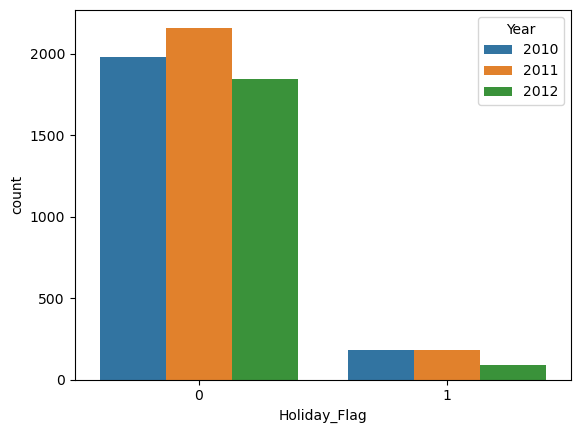

In [28]:
sns.countplot(data=data,x='Holiday_Flag',hue='Year')

In [29]:
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,May,2,Saturday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,December,2,Wednesday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February,19,Thursday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February,26,Thursday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,May,3,Sunday


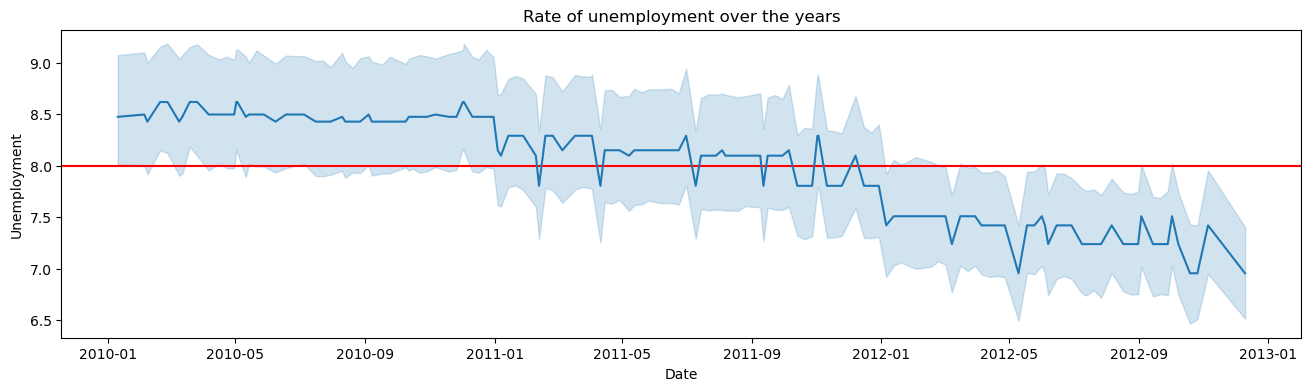

In [30]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.Unemployment.mean(),color='r')
sns.lineplot(x='Date',y='Unemployment',data=data)
plt.title("Rate of unemployment over the years")
plt.show()

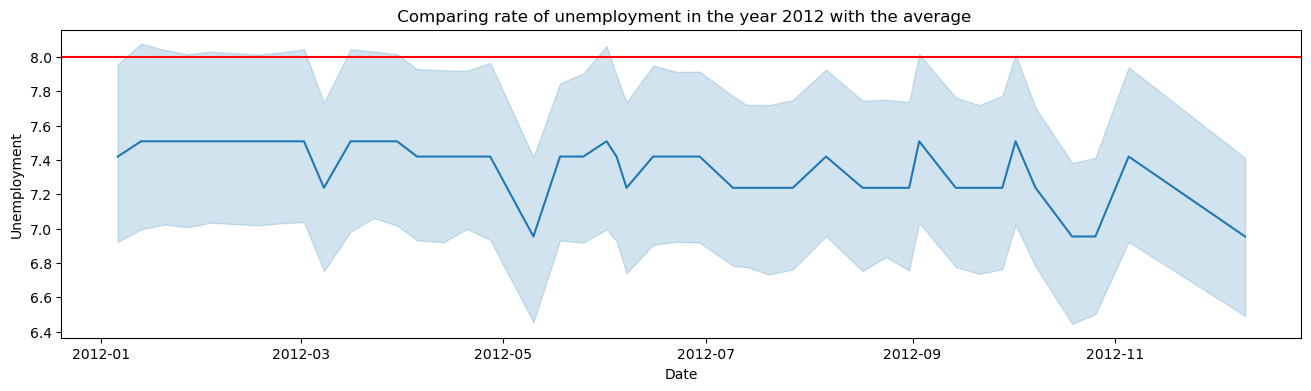

In [31]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.Unemployment.mean(),color='r')
sns.lineplot(x='Date',y='Unemployment',data=year_2012)
plt.title(" Comparing rate of unemployment in the year 2012 with the average")
plt.show()

#### Unemployment rate in the year 2012 is  below the mean

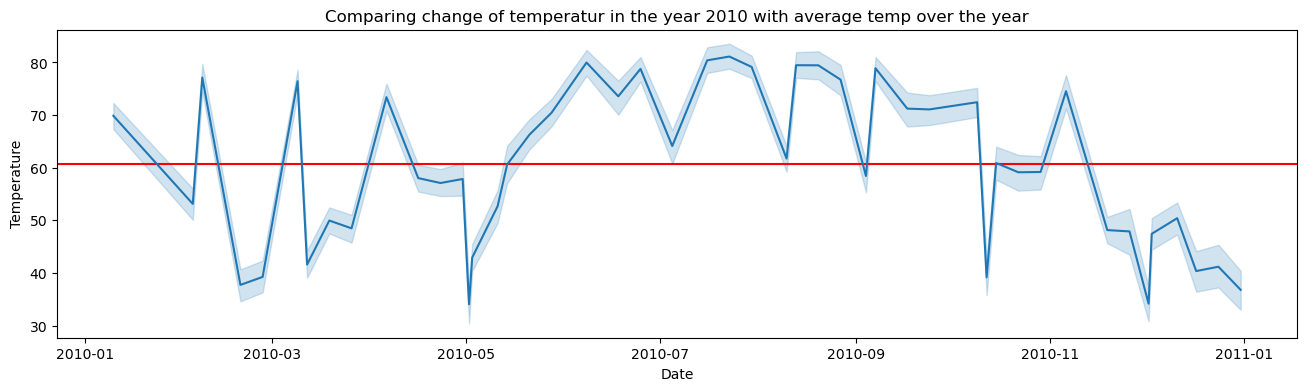

In [32]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.Temperature.mean(),color='r')
sns.lineplot(x='Date',y='Temperature',data=year_2010)
plt.title("Comparing change of temperatur in the year 2010 with average temp over the year")
plt.show()

<Axes: xlabel='Weekly_Sales', ylabel='Fuel_Price'>

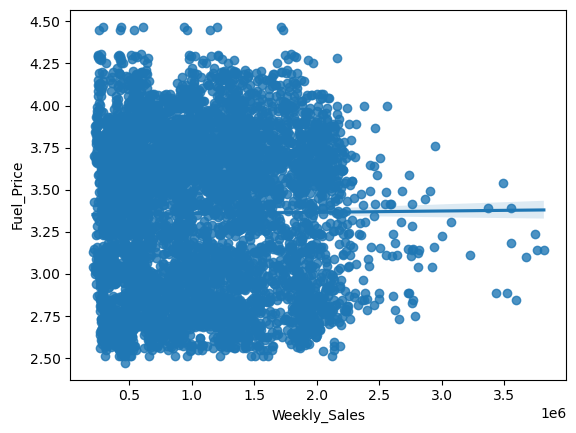

In [33]:
sns.regplot(data=data,x='Weekly_Sales',y='Fuel_Price')

In [34]:
Holyday_sale=data.groupby(['Holiday_Flag'])['Weekly_Sales'].mean()

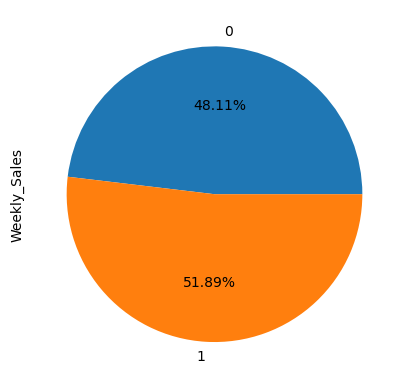

In [35]:
Holyday_sale.plot.pie(autopct='%1.2f%%');

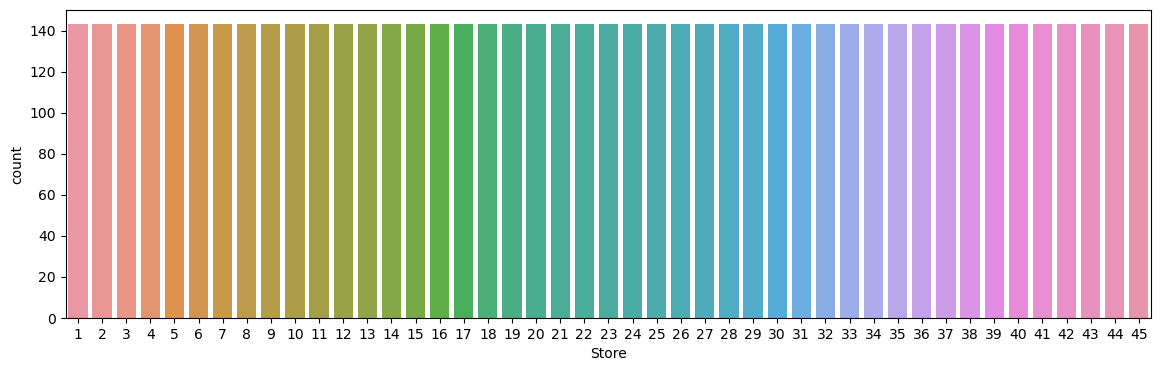

In [36]:
plt.figure(figsize=(14,4))
sns.countplot(x='Store',data=data)
plt.show()

#### 140+ data is entered for each 45 stores

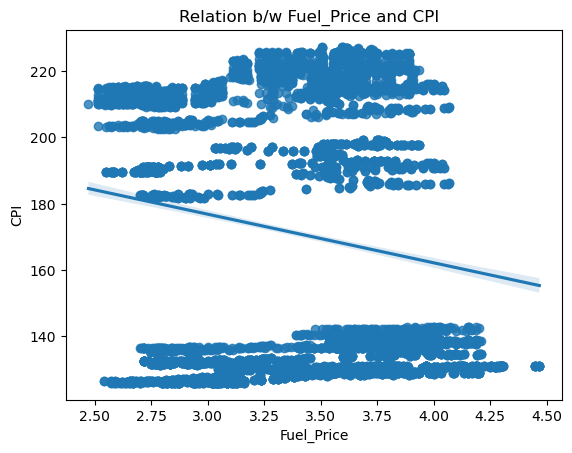

In [37]:
sns.regplot(data=data,x='Fuel_Price',y='CPI')
plt.title("Relation b/w Fuel_Price and CPI  ")
plt.show()

In [38]:
data.sample()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
19,1,2010-06-18,1503284.06,0,84.11,2.637,211.453772,7.808,2010,June,18,Thursday


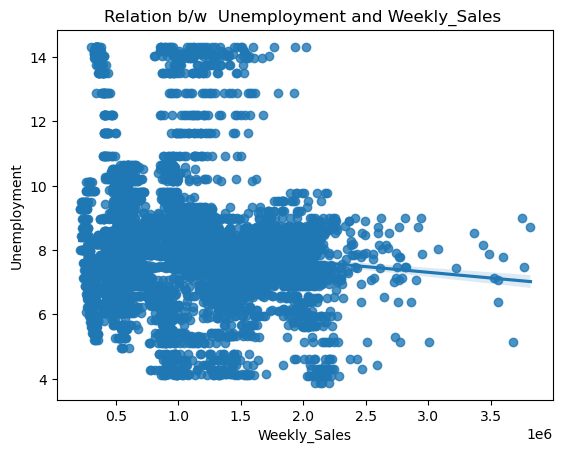

In [39]:
sns.regplot(data=data,x='Weekly_Sales',y='Unemployment')
plt.title("Relation b/w  Unemployment and Weekly_Sales ")
plt.show()

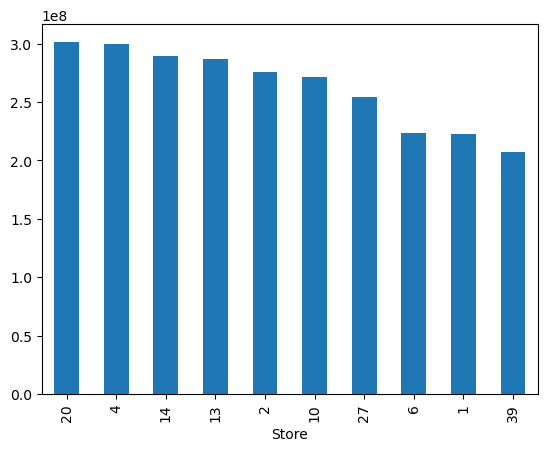

In [40]:
stores_sales=data.groupby(['Store'])['Weekly_Sales'].sum()
stores_sales.nlargest(10).plot.bar();



In [41]:
stores_sales_year=data.groupby(['Store','Year'])['Weekly_Sales'].sum()
stores_sales_year

Store  Year
1      2010    73278832.00
       2011    80921918.83
       2012    68202058.02
2      2010    95277864.19
       2011    98607881.42
                  ...     
44     2011    15498194.67
       2012    14187373.72
45     2010    38536343.37
       2011    41135367.88
       2012    32723630.17
Name: Weekly_Sales, Length: 135, dtype: float64

In [42]:
stores_sales_year=stores_sales_year.reset_index()

In [43]:
stores_sales_year.nlargest(5,'Weekly_Sales')

,Store,Year,Weekly_Sales
10,4,2011,1.110923e+08
58,20,2011,1.098370e+08
40,14,2011,1.060963e+08
39,14,2010,1.054622e+08
37,13,2011,1.045375e+08


In [44]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,May,2,Saturday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,December,2,Wednesday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February,19,Thursday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February,26,Thursday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,May,3,Sunday


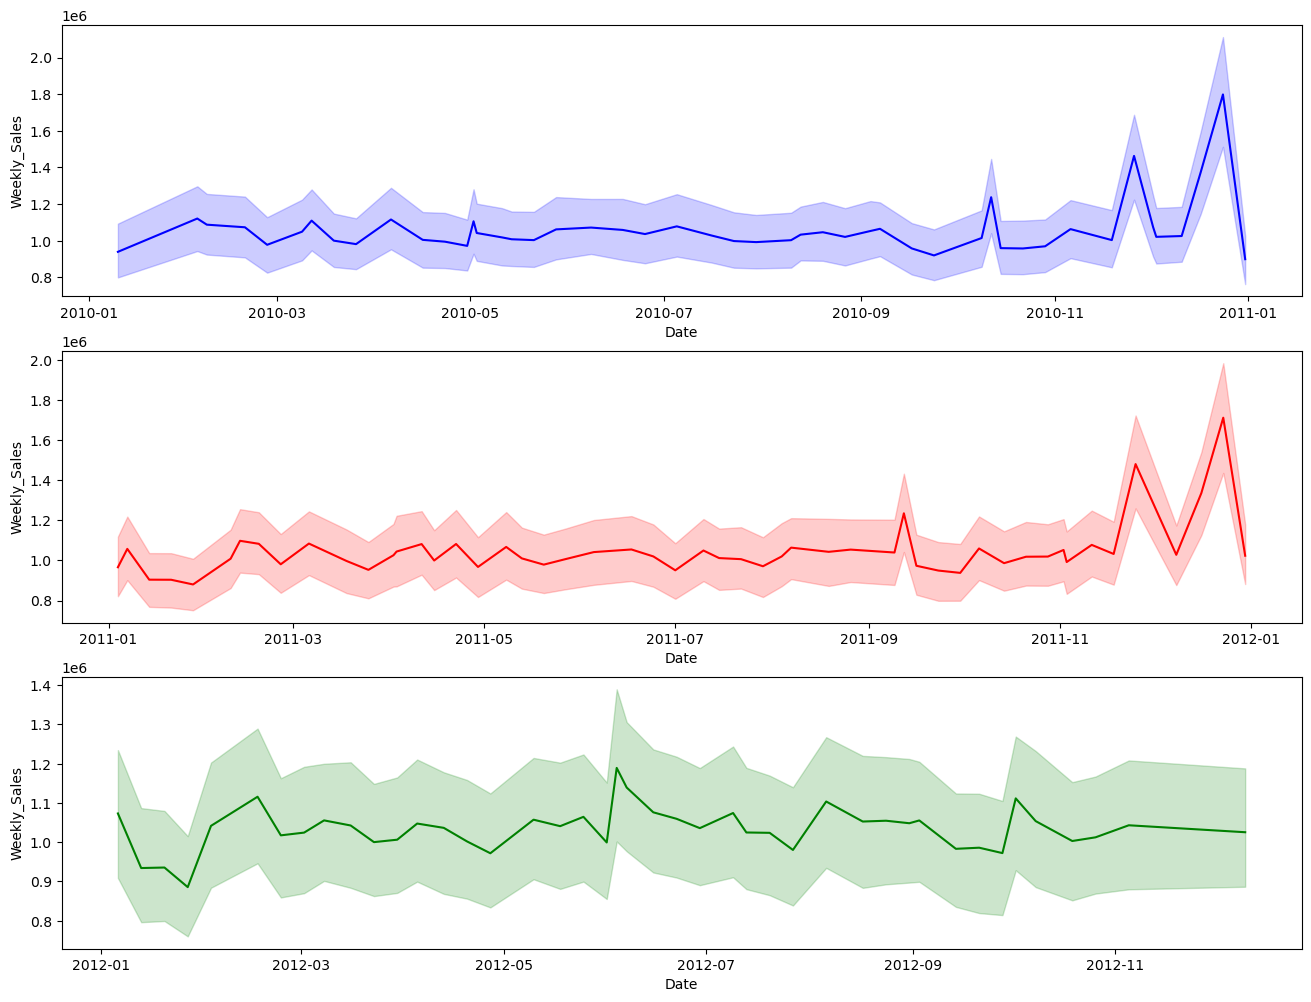

In [45]:
plt.figure(figsize=(16,12))
plt.subplot(3,1,1)
sns.lineplot(x='Date',y='Weekly_Sales',data=year_2010,color='b')

plt.subplot(3,1,2)
sns.lineplot(x='Date',y='Weekly_Sales',data=year_2011,color='r')

plt.subplot(3,1,3)
sns.lineplot(x='Date',y='Weekly_Sales',data=year_2012,color='g')
plt.show()

#### Top stores in each year

In [46]:
sales_stores_2010=stores_sales_year[stores_sales_year.Year==2010]
sales_stores_2011=stores_sales_year[stores_sales_year.Year==2011]
sales_stores_2012=stores_sales_year[stores_sales_year.Year==2012]

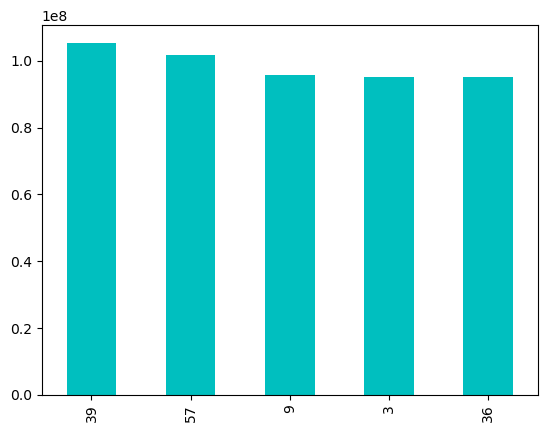

In [47]:
sales_stores_2010.Weekly_Sales.nlargest(5).plot.bar(color='c');

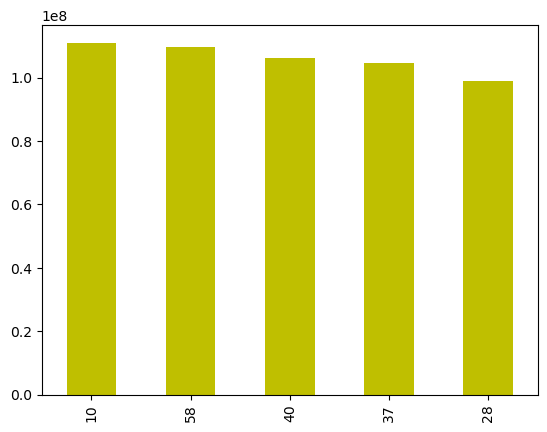

In [48]:
sales_stores_2011.Weekly_Sales.nlargest(5).plot.bar(color='y');

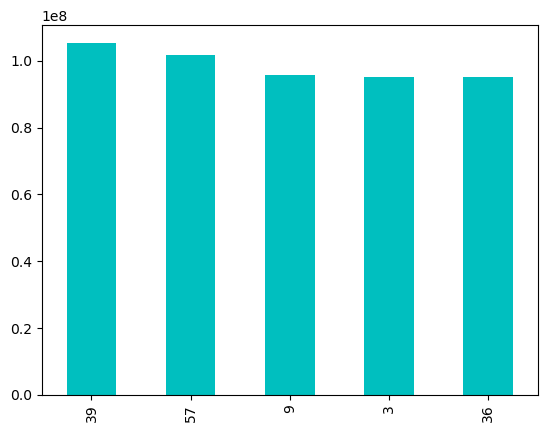

In [49]:
sales_stores_2010.Weekly_Sales.nlargest(5).plot.bar(color='c');

#### Temperature conversion(-2&#176; F - 32)*5/9


In [50]:
data['Celsius']=[(Temp-32)*(5/9) for Temp in data.Temperature]

In [51]:
data['Nature']=pd.cut(x=data.Celsius,bins=[-20,10,35],labels=['Cold','Warm'])

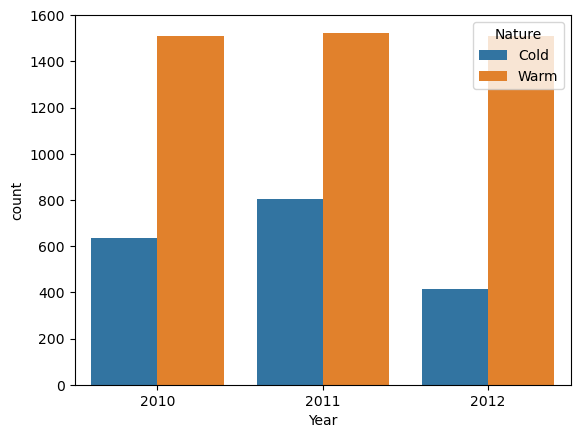

In [52]:
sns.countplot(x='Year',hue='Nature',data=data);

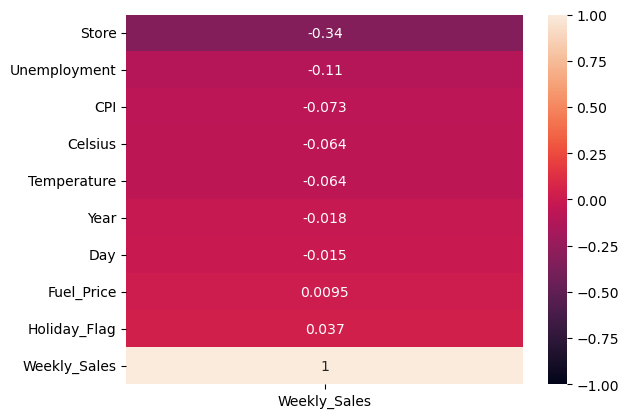

In [53]:
sns.heatmap(data.corr()[["Weekly_Sales"]].sort_values(by='Weekly_Sales'),annot=True,vmin=-1,vmax=1);

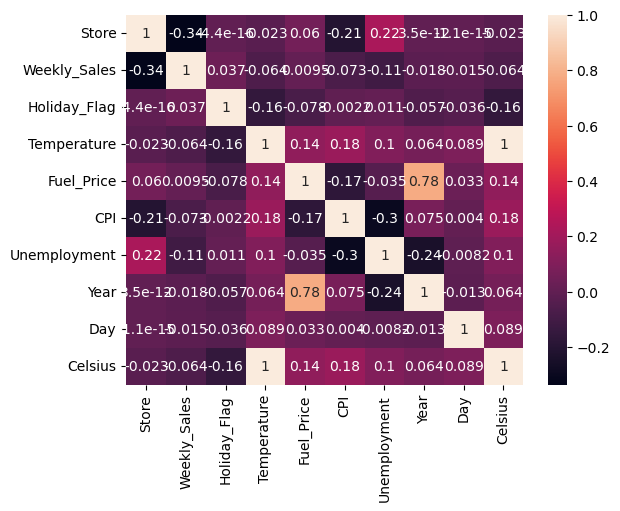

In [54]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [55]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday,Celsius,Nature
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,May,2,Saturday,5.727778,Cold
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,December,2,Wednesday,3.616667,Cold
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February,19,Thursday,4.405556,Cold
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February,26,Thursday,8.127778,Cold
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,May,3,Sunday,8.055556,Cold


In [56]:
cpi_year=data.groupby(['Year'])["CPI"].mean()

In [57]:
cpi_year

Year
2010    168.101782
2011    171.545716
2012    175.498781
Name: CPI, dtype: float64

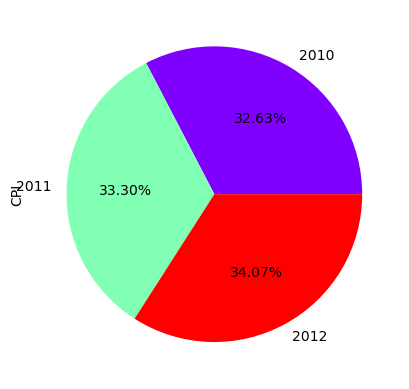

In [58]:
cpi_year.plot.pie(autopct='%0.2f%%',cmap='rainbow');

In [59]:
monthly_sales=pd.pivot_table(data=data,values='Weekly_Sales',index='Month',columns='Year')

In [60]:
monthly_sales

Year,2010,2011,2012
Month,,,
April,1.021177e+06,1.033220e+06,1.014127e+06
August,1.025212e+06,1.044895e+06,1.064514e+06
December,1.198413e+06,1.274311e+06,1.025078e+06
February,1.064372e+06,1.042273e+06,1.057997e+06
January,9.386639e+05,9.420697e+05,9.567817e+05
July,1.023702e+06,9.976049e+05,1.025480e+06
June,1.055082e+06,1.038471e+06,1.082920e+06
March,1.034590e+06,1.011263e+06,1.025510e+06
May,1.039303e+06,1.015565e+06,1.053948e+06


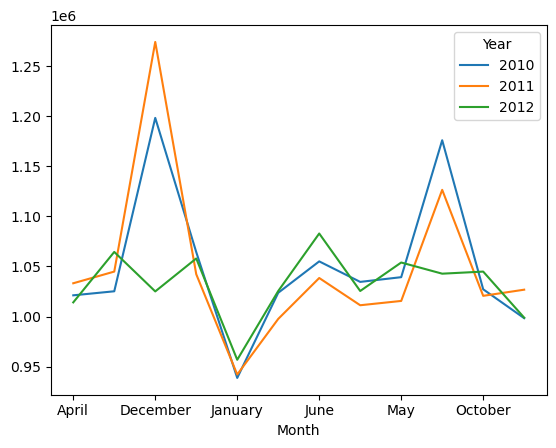

In [61]:
monthly_sales.plot();

In [62]:
Year_unemployment=data.groupby(['Year'])['Unemployment'].mean()

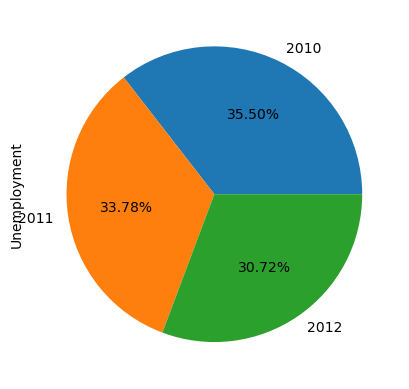

In [63]:
Year_unemployment.plot.pie(autopct='%1.2f%%');